Best Linear Model Parameters:
Intercept (Theta[0]): 5.313935769531633
Coefficient for X1 (Theta[1]): -2.00368657927539
Coefficient for X2 (Theta[2]): 0.53260157403109
Coefficient for X3 (Theta[3]): -0.26556794655534155

Best Learning Rate: 0.1

Impact of different learning rates on final loss:
For LR=0.1, the final loss is 0.7384642444783825.
For LR=0.05, the final loss is 0.7385305160274878.
For LR=0.01, the final loss is 0.9341735848306765.


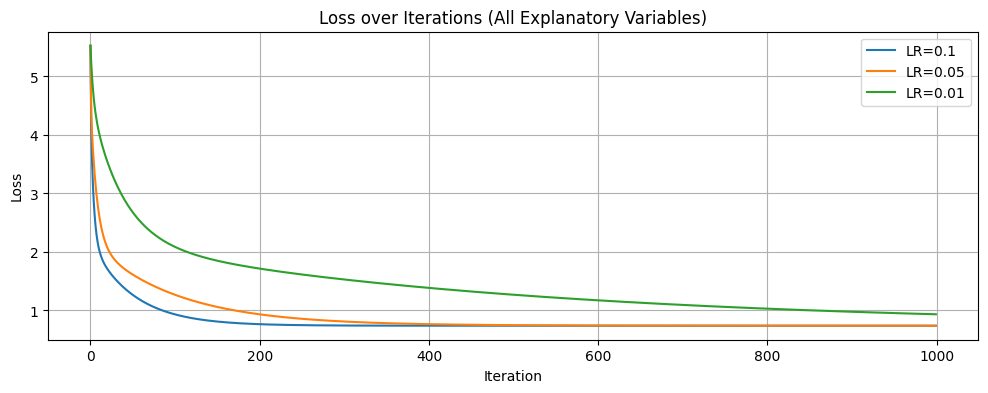


Predicted Y values for new (X1, X2, X3) values:
For (X1, X2, X3) = [1 1 1], predicted Y = 3.577
For (X1, X2, X3) = [2 0 4], predicted Y = 0.244
For (X1, X2, X3) = [3 2 1], predicted Y = 0.103


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

file_path = '/content/drive/MyDrive/D3.csv'
sample = pd.DataFrame(pd.read_csv(file_path))
sample.head()

# Load the dataset
dataset = pd.read_csv(file_path)
X = dataset[['X1', 'X2', 'X3']].values
Y = dataset['Y'].values

# Define gradient descent function
def gradient_descent(X, Y, learning_rate, num_iterations):
    m = len(Y)
    n = X.shape[1]
    theta = np.zeros(n)  # Initialize parameters to zero
    loss_history = []

    for iteration in range(num_iterations):
        error = X.dot(theta) - Y
        gradient = np.zeros(n)
        for i in range(n):
            gradient[i] = np.sum(error * X[:, i])
        theta -= (learning_rate / m) * gradient
        loss = np.sum(error ** 2) / (2 * m)
        loss_history.append(loss)

    return theta, loss_history

# Initialize variables
learning_rates = [0.1, 0.05, 0.01]
num_iterations = 1000

# Initialize lists to store results
models = []
losses = []

# Combine all three explanatory variables
X_combined = np.column_stack((np.ones(len(X)), X))

plt.figure(figsize=(12, 4))

# Initialize best model parameters and predicted values
best_model_theta = None
best_learning_rate = None
best_loss = float('inf')
predicted_values = None

for learning_rate in learning_rates:
    theta, loss_history = gradient_descent(X_combined, Y, learning_rate, num_iterations)
    models.append(theta)
    losses.append(loss_history[-1])

    # Plot the loss over iterations
    plt.plot(range(num_iterations), loss_history, label=f'LR={learning_rate}')

    # Update best model if the current model has a lower loss
    if loss_history[-1] < best_loss:
        best_loss = loss_history[-1]
        best_model_theta = theta
        best_learning_rate = learning_rate

# Predict values for new (X1, X2, X3) values
new_values = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])
new_values_with_intercept = np.column_stack((np.ones(new_values.shape[0]), new_values))
predicted_values = np.dot(new_values_with_intercept, best_model_theta)

# Display the best model and predictions
print("Best Linear Model Parameters:")
print("Intercept (Theta[0]):", best_model_theta[0])
print("Coefficient for X1 (Theta[1]):", best_model_theta[1])
print("Coefficient for X2 (Theta[2]):", best_model_theta[2])
print("Coefficient for X3 (Theta[3]):", best_model_theta[3])
print("\nBest Learning Rate:", best_learning_rate)

# Describe the impact of different learning rates
print("\nImpact of different learning rates on final loss:")
for i, lr in enumerate(learning_rates):
    print(f"For LR={lr}, the final loss is {losses[i]}.")

# Plot the loss over iterations
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations (All Explanatory Variables)')
plt.legend()
plt.grid(True)
plt.show()

# Display the predicted Y values
print("\nPredicted Y values for new (X1, X2, X3) values:")
for i, prediction in enumerate(predicted_values):
    print(f"For (X1, X2, X3) = {new_values[i]}, predicted Y = {prediction:.3f}")
